In [1]:
#!pip install pydot

In [75]:
import pandas as pd
#pandas
import numpy as np
#numpy
import matplotlib.pyplot as plt
#matplotlib
import seaborn as sns
#seaborn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
#sklearn
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout, Embedding, Flatten, Conv1D, MaxPooling1D, LSTM
from keras import utils
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras.optimizers import Adam
#keras
import tensorflow as tf
#tensorflow
import nltk 
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
#nltk
import re
import os
#other useful stuff
from wordcloud import WordCloud, STOPWORDS
#wordclouds and cloud stopwords
import warnings
warnings.filterwarnings("ignore")
import pydot
import string

from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
import pycountry
import re
import string
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.tokenize import sent_tokenize, word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
nltk.download('vader_lexicon')
from nltk.corpus import webtext
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import datetime


import pandas as pd
from langdetect import detect

import calendar
import time

import emoji

from afinn import Afinn

from senticnet.senticnet import SenticNet

from senticnet.babelsenticnet import BabelSenticNet

import re

import nltk
from nltk.corpus import sentiwordnet as swn
from nltk import pos_tag
from nltk.tag import str2tuple, map_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.corpus import wordnet as wn
from nltk.stem import PorterStemmer

import nltk
nltk.download('averaged_perceptron_tagger')

import nltk
nltk.download('sentiwordnet')

import nltk
nltk.download('words')
words = set(nltk.corpus.words.words())

from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# ML Libraries
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from nltk.tokenize import word_tokenize
from nltk.util import ngrams

from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

import collections



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package sentiwordnet to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package sentiwordnet is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


In [2]:
#Global Vars
GL_realDataFile = None
GL_realData_All = None
GL_realData = None
GL_realDataSize = None

GL_trainDataFile = None
GL_trainData_All = None
GL_trainData = None
GL_trainDataSize = None

GL_criteria = None

GL_Data = None

GL_DataNgrams = [None, None]
GL_X_trainData = None
GL_Y_trainData = None
GL_X_testData = None
GL_Y_testData = None

In [155]:
def getDataFromFile(inputFile, wrds):
    #Ανάγνωση του αρχείου που θα χρησιμοποιηθεί για την εκπαίδευση του μοντέλου
    GL_trainDataFile = pd.read_csv(inputFile, encoding='latin-1', header=None)
    #Οι στήλες αλλάζουν ονομασίες
    GL_trainDataFile = GL_trainDataFile.rename(columns={0: 'Sentiment', 1: 'ID', 2: 'Date', 3: 'Query', 4: 'Username', 5: 'Body', 6:"Language"})
    #Διατηρούνται μόνο οι απαραίτητες στήλες
    #1. Διατηρείται επιπλέον πληροφορία 
    GL_trainData = GL_trainDataFile.drop(['ID','Date','Query','Username'], axis=1, inplace=False)
    #Κρατούνται τα κριτήρια ανάκτησης των αναρτήσεων
    GL_criteria = wrds
    return (GL_trainDataFile, GL_trainData, GL_criteria)

#καθάρισμα των tweets που θα χρησιμοποιηθούν για την εκπαίδευση των μοντέλων
def readCleanTrainDataFromFile(inputFile):
    GL_trainData = pd.read_csv(inputFile, encoding='latin-1')
    #για να δημιουργηθούν πιο γρήγορα τα μοντέλα χρησιμοποιούνται 200000 εγγραφές και 
    #κρατούνται μόνο ο χαρακτηρισμός των tweets και το περιεχόμενο τους
    GL_trainData = GL_trainData.loc[:,['Sentiment','Body']].sample(n=200000)
    #το πλήθος των tweets που χρησιμοποιούνται για εκπαίδευση
    GL_trainDataSize = GL_trainData.shape[0]
    return (GL_trainData, GL_trainDataSize)

   
#Γίνεται καθαρισμός των tweets
def cleanData(DATA=None, criteria = None):
    for i in range(0,len(DATA.Body)):
        try:
            tweet = DATA.Body[i]
            english_stopwords = stopwords.words('english')
            stemmer = SnowballStemmer('english')
            #Αφαιρούνται οι λέξεις που χρησιμοποιήθηκαν για την αναζήτηση των tweets
            tweet = " ".join(w for w in nltk.wordpunct_tokenize(tweet) if w not in criteria)
            tweet = " ".join(w.lower() for w in nltk.wordpunct_tokenize(tweet) if w.lower() not in criteria)
            #Αφαιρεση των όρων που ξεκινάνε με @
            tweet = re.sub("@[A-Za-z0-9]+","",tweet) 
            tweet = re.sub("@","",tweet) 
            #Αφαίρεση των links
            tweet = re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", tweet) 
            #Αφαιρούνται περιπ΄τωσεις όπου βρ΄ισκονται διαδοχικά πάνω από 2 κενά.
            tweet = " ".join(tweet.split())
            #Αφαιρούνται τα εικονίδια
            tweet = ''.join(c for c in tweet if c not in emoji.UNICODE_EMOJI['en']) #Remove Emojis
            #Αφαίρεση των χαρακτηρων #
            tweet = tweet.replace("#", "")
            #Αφαίρεση των χαρακτηρων _
            tweet = tweet.replace("_", " ") 
            #Αφαίρεση μη αγγλικών λέξεων
            tweet = " ".join(w.lower() for w in nltk.wordpunct_tokenize(tweet) if w.lower() in words )
            #Αφαίρεση των αγγλικών stop words
            stop_words = set(stopwords.words('english'))
            tweet = word_tokenize(tweet)
            tweet = " ".join(w for w in tweet if not w.lower() in stop_words)

            #συγκεντρώνονται σε λίστα όλοι οι όροι που περιλαμβάνονται στο μηνυμα 
            tokens = []
            for token in tweet.split():
                if token not in english_stopwords:
                    tokens.append(stemmer.stem(token))
            #αφαιρούνται τα σημεία στίξης
            table = str.maketrans('', '', string.punctuation)
            tokens = [w.translate(table) for w in tokens]
            ps = PorterStemmer()
            tokens = [ps.stem(w) for w in tokens]
            lemmatizer = WordNetLemmatizer()
            tokens = [lemmatizer.lemmatize(w, pos='a') for w in tokens]
            #Επιστρέφει τη λίστα με τους όρους του μηνύματος που θα χρησιμοποιηθούν στη διαδικασία
            #το καθαρισμενο tweet περνάει ακόμα ένα στάδιο προεπξεργασίας
            DATA.Body[i] = " ".join(tokens)
        except:
            continue
    return DATA
            
            
#η λίστα των n-grams μετατρέπεται σε string
def listToString(s):
    return " ".join(s);

#ανάγνωση πραγματικών tweets από αρχείο
def readActualData(filename):
    GL_realData = pd.read_csv(filename)
    #διαγραφή των διπλότυπων
    GL_realData.drop_duplicates(inplace = True,subset="text")
    #χαρακτηρισμός όλων σαν αρνητικά 
    GL_realData['Sentiment']=0
    #κρατούνται μόνο οι στήλες του συναισθήματος και του κειμένου
    GL_realData = GL_realData.loc[:,['Sentiment','text']]
    GL_realData.Sentiment = 0
    #μετονομασία της στήλης text σε Body
    GL_realData=GL_realData.rename(columns={"text":"Body"})
    #αναδιάταξη των index του dataframe
    GL_realData.reset_index(drop=True, inplace = True)
    #κρατείται το πλήθος των πραγματικών tweets
    GL_realDataSize = GL_realData.shape[0]
    return (GL_realData, GL_realDataSize)
        
#Συνένωση των tweet εκπαίδευσης και των πραγματικών σε ένα σύνολο    
def concatenateTrainAndActualData(GL_traintData, GL_realData):
    GL_Data = pd.concat([GL_trainData, pd.DataFrame(GL_realData.values, columns=['Sentiment','Body'])])
    #γίνεται αναδιάταξη των indexes
    GL_Data.reset_index(drop=True, inplace = True)
    #κάθε nan εγγραφή αντικαθίσταται με κεν΄ό
    GL_Data.Body = GL_Data.Body.fillna(' ')
    #κρατείται το μέγεθος του τελικού συνόλου tweets
    GL_DataSize = GL_Data.shape[0]
    return (GL_Data, GL_DataSize)
    
#Δημιουργεί τα TRAIN και TEST σύνολα για n-grams
def prepareXsetYset(data, j):
    vector = TfidfVectorizer(sublinear_tf=True)
    #αναδιάταξη των συνολων για να χρησιμοποιηθούν από τις συναρτ΄ήσεις εκπαίδευσης και αξιολόγησης
    tf_vector = vector.fit(np.array(data.iloc[:, 1]).ravel())
    X = tf_vector.transform(np.array(data.iloc[:, 1]).ravel())
    y = np.array(data.iloc[:, 0]).ravel()
    #Δημιουργούνται τα σύνολα
    x0 = X[0:j]
    y0 = y[0:j]
    y0 = np.asarray(y0, dtype="|S6")
    x1 = X[j:X.shape[0]]
    return (x0,y0,x1)
        
#Δημιουργεί εκδοχές των δεδομένων με 2, 3, 4 grams
def makeNgramsDataVersions(data, n, real = "True"):
    GL_DataNgrams = []
    #Δημιουργείται ένα αντίγραφο του συνόλου των δεδομένων
    cpy = data.copy()
    #διαμόρφωση του συνόλου των δεδομ΄ένων
    for i in range(0,cpy.shape[0]):
        n_grams = ngrams(word_tokenize(cpy.Body[i]), n)
        #Δημιουργία της λίστας των ngrams
        cpy.Body[i] = [ ' '.join(grams) for grams in n_grams]
        #Μετατροπή της λίστας των ngrams σε string
        cpy.Body[i] = listToString(cpy.Body[i])
    #Δημιουργία των αντιστοίχων συνόλων εκπαίδευσης και αξιολόγησης
    if real == False:
        return prepareXsetYset()
    else:
        return cpy
            
    
#Δημιουργία μοντέλου πρόβλεψης και πρόβλεψη με naive-bayes
def naiveBayes(trainX, trainY, X):
    
    #Εκπαίδευση του μοντέλου
    NB_model = MultinomialNB()
    NB_model.fit(trainX, trainY)
    y_predict_nb_tweets = NB_model.predict(X)
    counter=list(collections.Counter(y_predict_nb_tweets).items())
    
    (unique, counts) = np.unique(y_predict_nb_tweets, return_counts=True)
    frequencies = np.asarray((unique, counts)).T
    FirstCategory = int(frequencies[0][0])
    SecondCategory = int(frequencies[1][0])
    print(FirstCategory,"-",SecondCategory)
    labelsArray = ['ΘΕΤΙΚΑ','ΑΡΝΗΤΙΚΑ']
    colorsArray = ['blue','red']
    dataArray = [int(frequencies[1][1]), int(frequencies[0][1])]
    if FirstCategory == 0:
        labelsArray = ['ΑΡΝΗΤΙΚΑ','ΘΕΤΙΚΑ']
        colorsArray = ['red','blue']
        dataArray = [int(frequencies[0][1]), int(frequencies[1][1])]
    pc = [0,0]
    pc[0] = float(frequencies[0][1])/(float(frequencies[0][1])+float(frequencies[1][1]))
    pc[1] = float(frequencies[1][1])/(float(frequencies[0][1])+float(frequencies[1][1]))
    
    print("Πλήθος Αρνητικών:",frequencies[0][1],"Πλήθος Θετικών:",frequencies[1][1])
    print("Ποσοστός Αρνητικών:",pc[0]," Ποσοστό Θετικών:",pc[1])
    
    
    #εμφάνιση του διαγράμματος πρόβλεψης
    plt.pie(dataArray, labels = labelsArray, colors = colorsArray)
    plt.title('Naive Bayes')
    plt.show() 
    
    plt.bar(labelsArray,dataArray, color = colorsArray)
    plt.title('Naive Bayes')
    plt.xlabel('Συναίσθημα')
    plt.ylabel('Πλήθος')
    plt.show()
    
    
#Δημιουργία μοντέλου πρόβλεψης και πρόβλεψη με Logistic Reggression
def logisticRegression(trainX, trainY, X):
    #Εκπαίδευση του μοντέλου
    LR_model = LogisticRegression(solver='lbfgs')
    LR_model.fit(trainX, trainY)
    #Αξιολόγηση του μοντέλου
    y_predict_lr = LR_model.predict(X)
    counter=list(collections.Counter(y_predict_lr).items())
    
    (unique, counts) = np.unique(y_predict_lr, return_counts=True)
    frequencies = np.asarray((unique, counts)).T
    FirstCategory = int(frequencies[0][0])
    SecondCategory = int(frequencies[1][0])
    print(FirstCategory,"-",SecondCategory)
    labelsArray = ['ΘΕΤΙΚΑ','ΑΡΝΗΤΙΚΑ']
    colorsArray = ['blue','red']
    dataArray = [int(frequencies[1][1]), int(frequencies[0][1])]
    if FirstCategory == 0:
        labelsArray = ['ΑΡΝΗΤΙΚΑ','ΘΕΤΙΚΑ']
        colorsArray = ['red','blue']
        dataArray = [int(frequencies[0][1]), int(frequencies[1][1])]
    pc = [0,0]
    pc[0] = float(frequencies[0][1])/(float(frequencies[0][1])+float(frequencies[1][1]))
    pc[1] = float(frequencies[1][1])/(float(frequencies[0][1])+float(frequencies[1][1]))
    
    print("Πλήθος Αρνητικών:",int(frequencies[0][1]),"Πλήθος Θετικών:",int(frequencies[1][1]))
    print("Ποσοστό Αρνητικών:",pc[0]," Ποσοστό Θετικών:",pc[1])
    
    
    #εμφάνιση του διαγράμματος πρόβλεψης
    plt.pie(dataArray, labels = labelsArray, colors = colorsArray)
    plt.title('Logistic Regression')
    plt.show() 

    plt.bar(labelsArray,dataArray, color = colorsArray)
    plt.title('Logistic Regression')
    plt.xlabel('Συναίσθημα')
    plt.ylabel('Πλήθος')
    plt.show()
    
#Δημιουργία μοντέλου πρόβλεψης και πρόβλεψη με πολυεπίπεδο νευρωνικό δίκτυο    
def NN(trainX, trainY, X):
    #Εκπαίδευση του μοντέλου
    clf = MLPClassifier(random_state=1, max_iter=5).fit(trainX, trainY)
    #Προβλεψη με βάση το μοντέλο
    y_predict_MLP_tweets = clf.predict(X=X)
    counter=list(collections.Counter(y_predict_MLP_tweets).items())
    #εμφάνιση του διαγράμματος 
    
    (unique, counts) = np.unique(y_predict_MLP_tweets, return_counts=True)
    frequencies = np.asarray((unique, counts)).T
    FirstCategory = int(frequencies[0][0])
    SecondCategory = int(frequencies[1][0])
    print(FirstCategory," ",SecondCategory)
    labelsArray = ['ΘΕΤΙΚΑ','ΑΡΝΗΤΙΚΑ']
    colorsArray = ['blue','red']
    dataArray = [int(frequencies[1][1]), int(frequencies[0][1])]
    if FirstCategory == 0:
        labelsArray = ['ΑΡΝΗΤΙΚΑ','ΘΕΤΙΚΑ']
        colorsArray = ['red','blue']
        dataArray = [int(frequencies[0][1]), int(frequencies[1][1])]
    pc = [0,0]
    pc[0] = float(frequencies[0][1])/(float(frequencies[0][1])+float(frequencies[1][1]))
    pc[1] = float(frequencies[1][1])/(float(frequencies[0][1])+float(frequencies[1][1]))
    
    print("Πλήθος Αρνητικών:",frequencies[0][1],"Πλήθος Θετικών:",frequencies[1][1])
    print("Ποσοστός Αρνητικών:",pc[0]," Ποσοστό Θετικών:",pc[1])
    
    plt.pie(dataArray, labels = labelsArray, colors = colorsArray)
    plt.title('Multilayer Pereceptron')
    plt.show() 

    plt.bar(labelsArray,dataArray, color = colorsArray)
    plt.title('Multilayer Pereceptron')
    plt.xlabel('Συναίσθημα')
    plt.ylabel('Πλήθος')
    plt.show()



In [159]:
#Οι όροι που χρησιμοποιήθηκαν για την ανάκτηση των tweets
keyword = ["Putin", "#Putin"]
#Δημιουργία του Dataset που θα χρησιμοποιηθεί για την εκπαίδευση των μοντέλων
res  = getDataFromFile("training.1600000.processed.noemoticon.csv",keyword)
GL_trainDataFile = res[0]
GL_trainData = res[1]
GL_criteria = res[2]

In [160]:
#Τα περιεχόμενα του αρχείου που θα χρησιμοποιηθεί για την εκπαίδευση των μοντέλων
GL_trainData.head(10)

,Sentiment,Body
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."
5,0,@Kwesidei not the whole crew
6,0,Need a hug
7,0,@LOLTrish hey long time no see! Yes.. Rains a...
8,0,@Tatiana_K nope they didn't have it
9,0,@twittera que me muera ?


In [161]:
#Καθαρισμός των δεδομένων εκπαίδευσης
#cleanData(DATA = GL_trainData, criteria = ['Putin','#Putin'])

In [162]:
#Ανάκτηση του καθαρού συνόλου δεδομένων με 2-γράμματα
res = readCleanTrainDataFromFile("ADV1.csv")
GL_trainData = res[0]
GL_trainDataSize = res[1]

<AxesSubplot:>

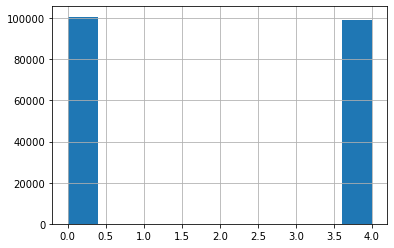

In [163]:
#Η κατανομη των αναρτήσεων με βάση την κατηγορία τους
GL_trainData['Sentiment'].hist()

# PUTIN / 2-GRAMS

In [164]:
#λαμβάνονται τα πραγματικά tweets
res = readActualData("Putin.csv")
GL_realData = res[0]
GL_realDataSize = res[1]
#καθαρισμός των δεδομένων
GL_realData = cleanData(DATA = GL_realData, criteria = ['Putin','#Putin'])

In [165]:
#Τα πραγματικά δεδομενα μετατρέπονται σε 2-grams
actualData2 = makeNgramsDataVersions(GL_realData,2, True)
actualData2

,Sentiment,Body
0,0,
1,0,close russia russia close close especi
2,0,damn back back hair hair thing thing angri
3,0,turkey presid presid set set meet
4,0,insurrectionist set set redefin redefin human ...
...,...,...
19909,0,think suppo suppo thank
19910,0,stand russia russia pray pray man man chang ch...
19911,0,oh right right barri barri middl middl deal
19912,0,


In [166]:
#για να μετατραπούν τα 2-grams σε διανύσματα, θα πρέπει να ενωθούν τα dataset εκπαίδευσης και των πραγματικών αναρτήσεων 
resall = concatenateTrainAndActualData(GL_trainData, actualData2)
#μετατροπή σε διανύσματα
res = prepareXsetYset(resall[0],GL_trainData.shape[0])
#Οι παράμετροι εισόδου για δημιουργια μοντέλων και προβλέψεις
trainX2 = res[0]
trainY2 = res[1]
X2 = res[2]

0 - 4
Πλήθος Αρνητικών: b'10948' Πλήθος Θετικών: b'8966'
Ποσοστός Αρνητικών: 0.5497639851360852  Ποσοστό Θετικών: 0.45023601486391485


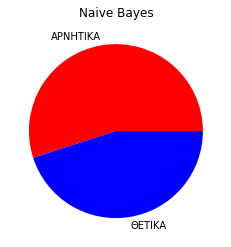

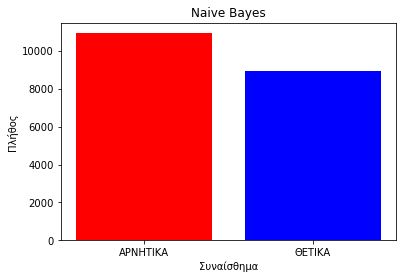

In [167]:
naiveBayes(trainX2,trainY2,X2)

0 - 4
Πλήθος Αρνητικών: 8966 Πλήθος Θετικών: 10948
Ποσοστό Αρνητικών: 0.45023601486391485  Ποσοστό Θετικών: 0.5497639851360852


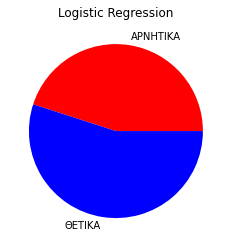

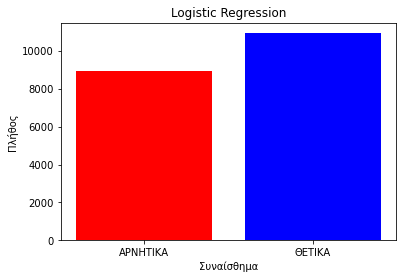

In [168]:
logisticRegression(trainX2,trainY2,X2)

0   4
Πλήθος Αρνητικών: b'9238' Πλήθος Θετικών: b'10676'
Ποσοστός Αρνητικών: 0.4638947474138797  Ποσοστό Θετικών: 0.5361052525861203


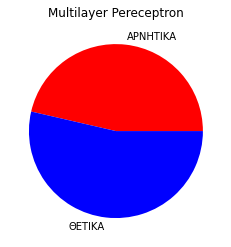

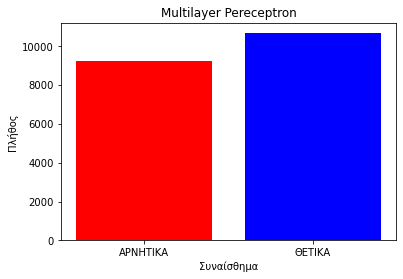

In [169]:
NN(trainX2,trainY2,X2)

# ZELENSKYY 2-GRAMS

In [170]:
#λαμβάνονται τα πραγματικά tweets
res = readActualData("Zelenskyy.csv")
GL_realData = res[0]
GL_realDataSize = res[1]
#καθαρισμός των δεδομένων
GL_realData = cleanData(DATA = GL_realData, criteria = ['Zelenskyy','#Zelenskyy'])

In [171]:
#Τα πραγματικά δεδομενα μετατρέπονται σε 2-grams
actualData2 = makeNgramsDataVersions(GL_realData,2, True)
actualData2

,Sentiment,Body
0,0,lack trust trust u u presid presid joe
1,0,know certain certain trump trump favor favor t...
2,0,keep fight fight war war damn damn ho
3,0,alreadi movi
4,0,smart enough enough know know tide tide turn t...
...,...,...
9787,0,rememb feed feed peopl peopl either
9788,0,undertak massiv massiv redeploy redeploy three...
9789,0,understand major major coupl coupl sooner soon...
9790,0,correct toward toward russia russia know


In [172]:
#για να μετατραπούν τα 2-grams σε διανύσματα, θα πρέπει να ενωθούν τα dataset εκπαίδευσης και των πραγματικών αναρτήσεων 
resall = concatenateTrainAndActualData(GL_trainData, actualData2)
#μετατροπή σε διανύσματα
res = prepareXsetYset(resall[0],GL_trainData.shape[0])
#Οι παράμετροι εισόδου για δημιουργια μοντέλων και προβλέψεις
trainX2 = res[0]
trainY2 = res[1]
X2 = res[2]

0 - 4
Πλήθος Αρνητικών: b'4479' Πλήθος Θετικών: b'5313'
Ποσοστός Αρνητικών: 0.4574142156862745  Ποσοστό Θετικών: 0.5425857843137255


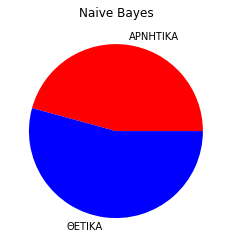

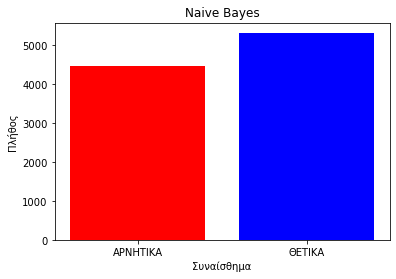

In [173]:
naiveBayes(trainX2,trainY2,X2)

0 - 4
Πλήθος Αρνητικών: 4038 Πλήθος Θετικών: 5754
Ποσοστό Αρνητικών: 0.41237745098039214  Ποσοστό Θετικών: 0.5876225490196079


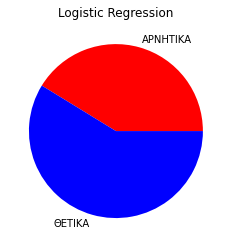

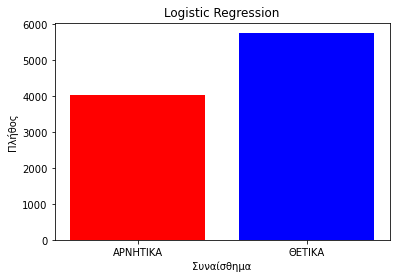

In [174]:
logisticRegression(trainX2,trainY2,X2)

0   4
Πλήθος Αρνητικών: b'4356' Πλήθος Θετικών: b'5436'
Ποσοστός Αρνητικών: 0.44485294117647056  Ποσοστό Θετικών: 0.5551470588235294


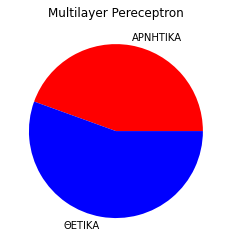

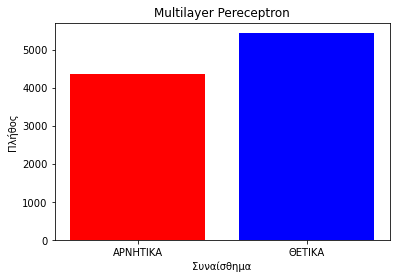

In [175]:
NN(trainX2,trainY2,X2)

# Putin 3-Grams

In [176]:
#Ανάκτηση του καθαρού συνόλου δεδομένων με 2-γράμματα
res = readCleanTrainDataFromFile("ADV2.csv")
GL_trainData = res[0]
GL_trainDataSize = res[1]

<AxesSubplot:>

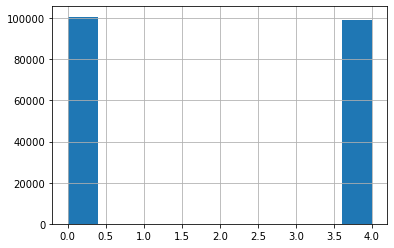

In [177]:
#Η κατανομη των αναρτήσεων με βάση την κατηγορία τους
GL_trainData['Sentiment'].hist()

In [178]:
#λαμβάνονται τα πραγματικά tweets
res = readActualData("Putin.csv")
GL_realData = res[0]
GL_realDataSize = res[1]
#καθαρισμός των δεδομένων
GL_realData = cleanData(DATA = GL_realData, criteria = ['Putin','#Putin'])

In [179]:
#Τα πραγματικά δεδομενα μετατρέπονται σε 2-grams
actualData2 = makeNgramsDataVersions(GL_realData,3, True)
actualData2

,Sentiment,Body
0,0,
1,0,close russia close russia close especi
2,0,damn back hair back hair thing hair thing angri
3,0,turkey presid set presid set meet
4,0,insurrectionist set redefin set redefin human ...
...,...,...
19909,0,think suppo thank
19910,0,stand russia pray russia pray man pray man cha...
19911,0,oh right barri right barri middl barri middl deal
19912,0,


In [180]:
#για να μετατραπούν τα 2-grams σε διανύσματα, θα πρέπει να ενωθούν τα dataset εκπαίδευσης και των πραγματικών αναρτήσεων 
resall = concatenateTrainAndActualData(GL_trainData, actualData2)
#μετατροπή σε διανύσματα
res = prepareXsetYset(resall[0],GL_trainData.shape[0])
#Οι παράμετροι εισόδου για δημιουργια μοντέλων και προβλέψεις
trainX2 = res[0]
trainY2 = res[1]
X2 = res[2]

0 - 4
Πλήθος Αρνητικών: b'11617' Πλήθος Θετικών: b'8297'
Ποσοστός Αρνητικών: 0.5833584412975796  Ποσοστό Θετικών: 0.4166415587024204


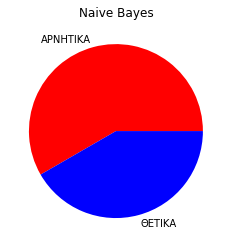

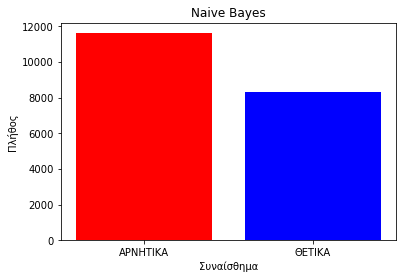

In [181]:
naiveBayes(trainX2,trainY2,X2)

0 - 4
Πλήθος Αρνητικών: 8483 Πλήθος Θετικών: 11431
Ποσοστό Αρνητικών: 0.4259817214020287  Ποσοστό Θετικών: 0.5740182785979713


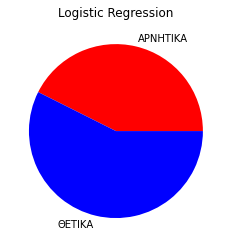

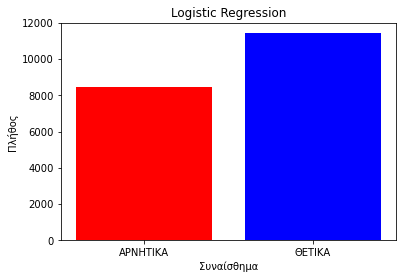

In [182]:
logisticRegression(trainX2,trainY2,X2)

0   4
Πλήθος Αρνητικών: b'8811' Πλήθος Θετικών: b'11103'
Ποσοστός Αρνητικών: 0.44245254594757455  Ποσοστό Θετικών: 0.5575474540524255


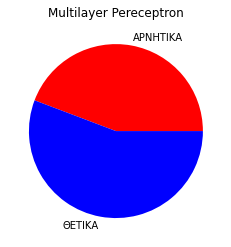

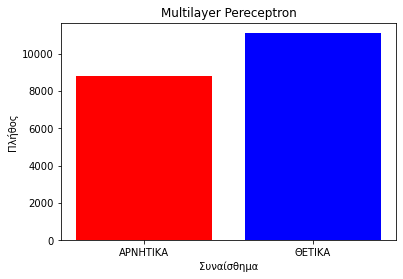

In [183]:
NN(trainX2,trainY2,X2)

# Zelenskyy 3 - Grams

In [189]:
#λαμβάνονται τα πραγματικά tweets
res = readActualData("Zelenskyy.csv")
GL_realData = res[0]
GL_realDataSize = res[1]
#καθαρισμός των δεδομένων
GL_realData = cleanData(DATA = GL_realData, criteria = ['Zelenskyy','#Zelenskyy'])

In [190]:
#Τα πραγματικά δεδομενα μετατρέπονται σε 2-grams
actualData2 = makeNgramsDataVersions(GL_realData,3, True)
actualData2

,Sentiment,Body
0,0,lack trust u trust u presid u presid joe
1,0,know certain trump certain trump favor trump f...
2,0,keep fight war fight war damn war damn ho
3,0,
4,0,smart enough know enough know tide know tide t...
...,...,...
9787,0,rememb feed peopl feed peopl either
9788,0,undertak massiv redeploy massiv redeploy three...
9789,0,understand major coupl major coupl sooner coup...
9790,0,correct toward russia toward russia know


In [194]:
#για να μετατραπούν τα 2-grams σε διανύσματα, θα πρέπει να ενωθούν τα dataset εκπαίδευσης και των πραγματικών αναρτήσεων 
resall = concatenateTrainAndActualData(GL_trainData, actualData2)
#μετατροπή σε διανύσματα
res = prepareXsetYset(resall[0],GL_trainData.shape[0])
#Οι παράμετροι εισόδου για δημιουργια μοντέλων και προβλέψεις
trainX2 = res[0]
trainY2 = res[1]
X2 = res[2]

0 - 4
Πλήθος Αρνητικών: b'4852' Πλήθος Θετικών: b'4940'
Ποσοστός Αρνητικών: 0.49550653594771243  Ποσοστό Θετικών: 0.5044934640522876


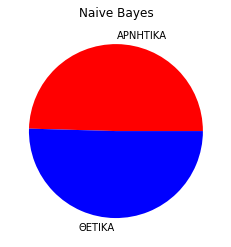

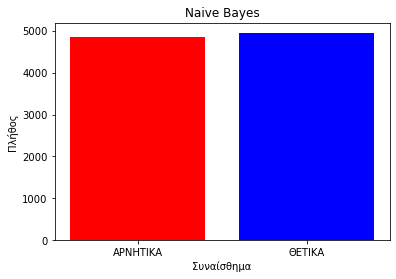

In [195]:
naiveBayes(trainX2,trainY2,X2)

0 - 4
Πλήθος Αρνητικών: 4125 Πλήθος Θετικών: 5667
Ποσοστό Αρνητικών: 0.4212622549019608  Ποσοστό Θετικών: 0.5787377450980392


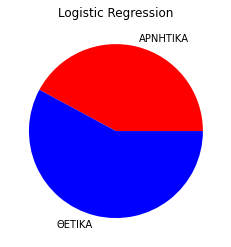

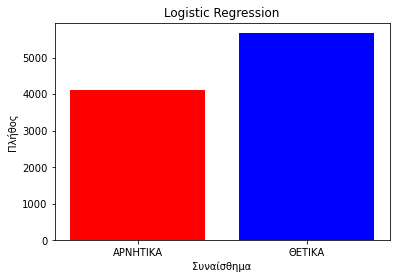

In [196]:
logisticRegression(trainX2,trainY2,X2)

0   4
Πλήθος Αρνητικών: b'3920' Πλήθος Θετικών: b'5872'
Ποσοστός Αρνητικών: 0.40032679738562094  Ποσοστό Θετικών: 0.5996732026143791


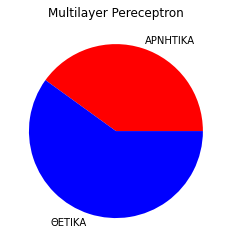

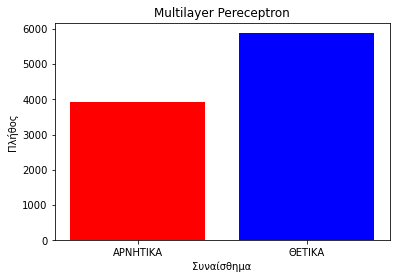

In [197]:
NN(trainX2,trainY2,X2)